In [1]:
from knowknow import *

In [ ]:
from params import *

In [2]:
from load_db import db as dta

loading variable infosci-wos-filtered-grouped/_attributes from disk
loading variable infosci-wos-filtered-grouped/groups from disk
loading variable infosci-wos-filtered-grouped/group_reps from disk


In [32]:
def key2name(tname, truncate=None):
    tstr = tname.split("|")
    if len(tstr) == 3:
        tstr = "%s (%s)\n%s" % (tstr[0], tstr[1], tstr[2])
    else:
        if False and tname in dd:
            yy = dd[tname][2]
        else:
            yy = db.trend('c', tname).first
        tstr = "%s (%s*)\n%s" % (tstr[0], yy, tstr[1])
    tstr = tstr.lower()
    return tstr

def author_fig(K, limit=None, yearlim=(1950,2015)):
    pubs = db.search('c',"%s|"%K)

    def first_10(x):
        tt = db.trend('c', x)
        return sum( tt.cits( tt.first, min(tt.data_end, tt.first+10) ) )

    def total(x):
        return db(c=x).cits

    def first_r(x):
        tt = db.trend('c', x)
        return (tt.first, tt.first+10)

    if limit is not None:
        pubs = sorted(pubs, key=lambda x:-db(c=x).cits)[:limit]
        
    pubs = sorted(pubs)
    

    viz.yearly_counts_table(db, 
        pubs, 
        NCOLS=2, 
        yearlim=yearlim, 
        tickstep=20,
        print_names={
            x: key2name(x)#"%s\n%s".join( x.split("|")[1:] )[:30] + "..."
            for x in pubs
        },
        #markranges={
        #    x:first_r(x)
        #    for x in pubs
        #}
    )
    #plt.title("Talcott Parsons")

In [13]:
ta_c = db.by('ta').cits

In [54]:
", ".join( x[0].split(",")[0] for x in sorted(ta_c, key=lambda x:-ta_c[x])[:5] )

'Venkatesh, Davis, Hair, Garfield, Orlikowski'

In [38]:
db.set_attribute('RELIABLE_DATA_ENDS_HERE', 2020)

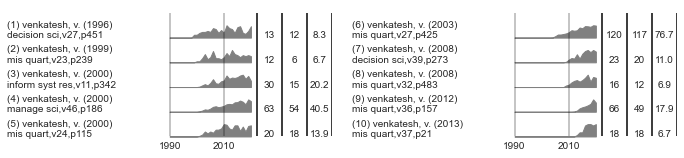

In [48]:
author_fig('Venkatesh, V.', 10, (1990,2020))
plt.savefig('venk.png')

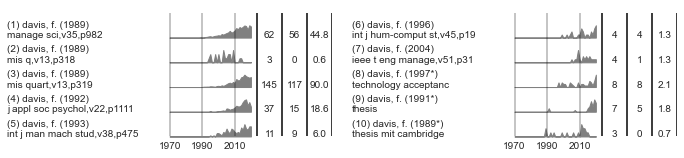

In [49]:
author_fig('Davis, F.', 10, (1970,2020))
plt.savefig('davis.png')

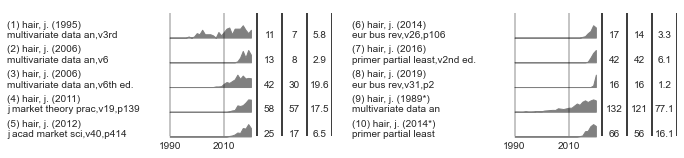

In [50]:
author_fig('Hair, J.', 10, (1990,2020))
plt.savefig('hair.png')

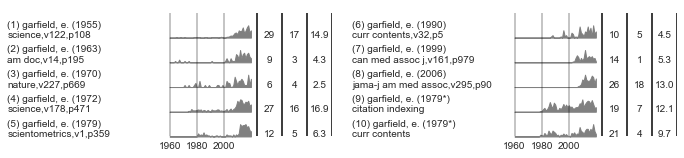

In [51]:
author_fig('Garfield, E.', 10, (1960,2020))
plt.savefig('garfield.png')

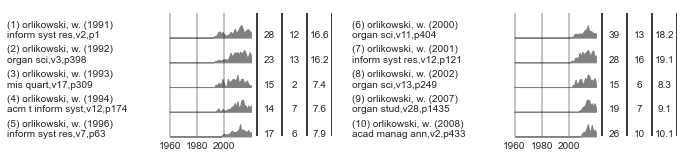

In [52]:
author_fig('Orlikowski, W.', 10, (1960,2020))
plt.savefig('orlikowski.png')